In [28]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [25]:
def detect_defects(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale for easier processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply edge detection to find edges in the image
    edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize a list to store detected defects
    detected_defects = []

    # Set a minimum defect area threshold (adjust as needed)
    min_defect_area = 100

    # Loop through the detected contours
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # If the area is smaller than the threshold, it may be a defect
        if area < min_defect_area:
            # Get the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)

            # Draw a rectangle around the potential defect
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Store the coordinates of the detected defect
            detected_defects.append((x, y, w, h))

    # Save the image with detected defects
    cv2.imwrite("/content/good.png", image)

    # Return the list of detected defects
    return detected_defects

# Example usage:
image_path = "/content/defect1.png"
detected_defects = detect_defects(image_path)
print("Detected defects:", detected_defects)


Detected defects: []


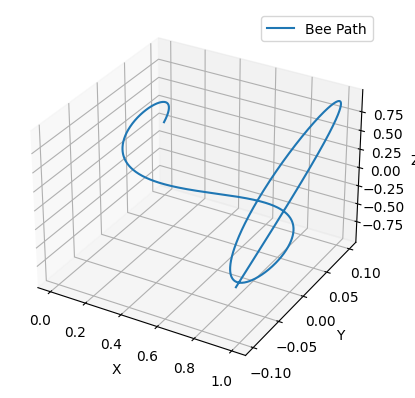

In [27]:
# Define parameters a, b, c, d, e, and f
a, b, c, d, e, f = 1.0, 0.2, 0.1, 1.5, 1.0, 1.0

# Define the time values (e.g., from 0 to 10 with a step of 0.01)
t = np.arange(0, 10, 0.01)

# Initialize arrays to store x, y, and z coordinates of the bee's path
x = []
y = []
z = []

# Calculate the bee's path over time using the equations
for time in t:
    x_val = a * np.sin(b * time)
    y_val = c * np.cos(d * time)
    z_val = e * np.sin(f * time)

    x.append(x_val)
    y.append(y_val)
    z.append(z_val)

# Create a 3D plot of the bee's path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Bee Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()
